In [185]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, tstd

In [30]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


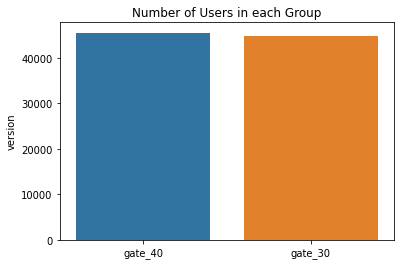

In [62]:
# two versions have been tested with a gate at level 30 (control group) and one at level 0 (experiment group)
sns.barplot(x = df.version.value_counts().index, y=df.version.value_counts())
plt.title('Number of Users in each Group')
plt.show()

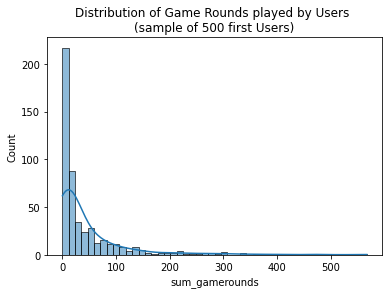

In [66]:
# sum_gamerounds is the number of game rounds played by players during the first 14 days
sns.histplot(df.sum_gamerounds[:500],
             kde=True)
plt.title('Distribution of Game Rounds played by Users \n(sample of 500 first Users)')
plt.show()

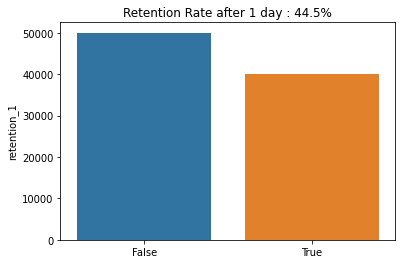

In [83]:
sns.barplot(x = df.retention_1.value_counts().index, y=df.retention_1.value_counts())
plt.title(f'Retention Rate after 1 day : {100*df.retention_1.mean():.1f}%')
plt.show()

In [127]:
# What is the average difference in retention after one day between the two groups ? 
means = df.groupby('version')['retention_1'].mean()
print('Is there a difference between the mean of the control group and the experiment group ?')
print(means)

Is there a difference between the mean of the control group and the experiment group ?
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


# Experiment Design

## Create two groups : control groups (gate_30) and experimental group (gate_40)

In [128]:
# In order to make inferences about the population statistics with our only one sample, we use a method called bootstrapping

[]

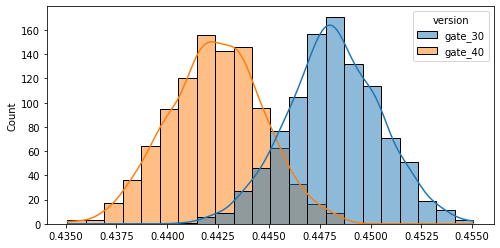

In [138]:
boots=[]
for i in range(1000):
    # this creates a sample of the size of the original sample but with replacement, so the mean will change for each sample
    boots.append(df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean())

# We transform into a dataframe for further manipulation
df_boots = pd.DataFrame(boots)

# We plot the distribution of each version
fig = plt.figure(figsize=(8,4))
sns.histplot(df_boots, kde=True)
plt.plot()

In [163]:
# There seems to be a difference, so let's check the probability that this difference is not due to randomness

## Collect statistics about user behaviors

In [228]:
# Number of experiments
N_control = df_boots.shape[0]
print(f'Number of experiments : {N_control}')

# Average retention rate of control group
mean_control = df_boots.gate_40.mean()
print(f'Average retention rate of the control groups: {mean_control:.4f}')

# Standard deviation of control group
std_dev_control = tstd(df_boots.gate_40)
print(f'Standard deviation of the control groups: {std_dev_control:.4f}')

Number of experiments : 1000
Average retention rate of the control groups: 0.4424
Standard deviation of the control groups: 0.0023


In [229]:
# Average retention rate of the experimental group
mean_experimental = df_boots.gate_30.mean()
print(f'Average retention rate of the experimental groups: {mean_experimental:.4f}')

Average retention rate of the experimental groups: 0.4482


# Test our hypothesis

## Null Hypothesis : the experimental feature doesn't change user behavior, which is the same than the control group

In [230]:
# Let's compute the distribution of X, the average retention rate of users
X = norm(mean_control, 
         std_dev_control)

## Alternative Hypothesis : the experimental feature increases the retention rate

# We choose a significance level of 5%

# We calculate the p-value

In [231]:
## What is the probability that X_exp is above or equal mean_exp given that the Null Hypothesis is true

In [233]:
p_value = (1-X.cdf(mean_experimental))
print(p_value)

0.005841533000761845


<AxesSubplot:>

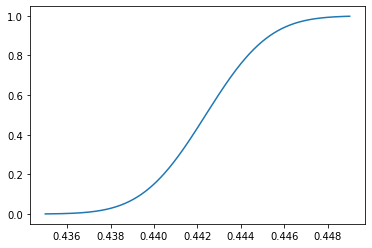

In [238]:
test_list = np.linspace(0.4350,0.4490,1000)
cdf_list = [X.cdf(i) for i in test_list]
sns.lineplot(x=test_list, y=cdf_list)

In [234]:
# Since p_value is below the statistical significance 0.5%, we consider that we can reject the null hypothesis 
p_value < 0.05

True

In [237]:
# Passing the gate to the level 30 increases the retention rate